# COVID-19 महामारी का अनुमान

## डेटा लोड करना

हम COVID-19 संक्रमित व्यक्तियों के डेटा का उपयोग करेंगे, जो [सिस्टम साइंस और इंजीनियरिंग केंद्र](https://systems.jhu.edu/) (CSSE) द्वारा [जॉन्स हॉपकिन्स यूनिवर्सिटी](https://jhu.edu/) में प्रदान किया गया है। यह डेटा [इस GitHub रिपॉजिटरी](https://github.com/CSSEGISandData/COVID-19) में उपलब्ध है।


In [124]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,3) # make figures larger

हम GitHub से सीधे `pd.read_csv` का उपयोग करके सबसे हालिया डेटा लोड कर सकते हैं। यदि किसी कारणवश डेटा उपलब्ध नहीं है, तो आप हमेशा `data` फ़ोल्डर में स्थानीय रूप से उपलब्ध कॉपी का उपयोग कर सकते हैं - बस नीचे दी गई पंक्ति को अनकमेंट करें जो `base_url` को परिभाषित करती है:


In [125]:
base_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/" # loading from Internet
# base_url = "../../data/COVID/" # loading from disk
infected_dataset_url = base_url + "time_series_covid19_confirmed_global.csv"
recovered_dataset_url = base_url + "time_series_covid19_recovered_global.csv"
deaths_dataset_url = base_url + "time_series_covid19_deaths_global.csv"
countries_dataset_url = base_url + "../UID_ISO_FIPS_LookUp_Table.csv"

In [126]:
infected = pd.read_csv(infected_dataset_url)
infected.head()

Province/State Country/Region       Lat       Long  1/22/20  1/23/20  \
0            NaN    Afghanistan  33.93911  67.709953        0        0   
1            NaN        Albania  41.15330  20.168300        0        0   
2            NaN        Algeria  28.03390   1.659600        0        0   
3            NaN        Andorra  42.50630   1.521800        0        0   
4            NaN         Angola -11.20270  17.873900        0        0   

   1/24/20  1/25/20  1/26/20  1/27/20  ...  8/20/21  8/21/21  8/22/21  \
0        0        0        0        0  ...   152448   152448   152448   
1        0        0        0        0  ...   138132   138790   139324   
2        0        0        0        0  ...   190656   191171   191583   
3        0        0        0        0  ...    14988    14988    14988   
4        0        0        0        0  ...    45583    45817    45945   

   8/23/21  8/24/21  8/25/21  8/26/21  8/27/21  8/28/21  8/29/21  
0   152583   152660   152722   152822   152960   152960   152960  
1   139721   140521   141365   142253   143174   144079   144847  
2   192089   192626   193171   193674   194186   194671   195162  
3    15002    15003    15014    15016    15025    15025    15025  
4    46076    46340    46539    46726    46929    47079    47168  

[5 rows x 590 columns]

हम देख सकते हैं कि तालिका की प्रत्येक पंक्ति प्रत्येक देश और/या प्रांत के लिए संक्रमित व्यक्तियों की संख्या को परिभाषित करती है, और स्तंभ तिथियों के अनुरूप हैं। इसी तरह की तालिकाएँ अन्य डेटा के लिए भी लोड की जा सकती हैं, जैसे कि ठीक होने वालों की संख्या और मौतों की संख्या।


In [127]:
recovered = pd.read_csv(recovered_dataset_url)
deaths = pd.read_csv(deaths_dataset_url)

## डेटा को समझना

ऊपर दी गई तालिका से `Province/State` कॉलम की भूमिका स्पष्ट नहीं है। आइए देखें कि `Province/State` कॉलम में कौन-कौन से विभिन्न मान मौजूद हैं:


In [128]:
infected['Province/State'].value_counts()

Australian Capital Territory    1
Xinjiang                        1
Martinique                      1
Guadeloupe                      1
French Polynesia                1
                               ..
Fujian                          1
Chongqing                       1
Beijing                         1
Anhui                           1
Turks and Caicos Islands        1
Name: Province/State, Length: 87, dtype: int64

In [129]:
infected[infected['Country/Region']=='China']

Province/State Country/Region      Lat      Long  1/22/20  1/23/20  \
58           Anhui          China  31.8257  117.2264        1        9   
59         Beijing          China  40.1824  116.4142       14       22   
60       Chongqing          China  30.0572  107.8740        6        9   
61          Fujian          China  26.0789  117.9874        1        5   
62           Gansu          China  35.7518  104.2861        0        2   
63       Guangdong          China  23.3417  113.4244       26       32   
64         Guangxi          China  23.8298  108.7881        2        5   
65         Guizhou          China  26.8154  106.8748        1        3   
66          Hainan          China  19.1959  109.7453        4        5   
67           Hebei          China  39.5490  116.1306        1        1   
68    Heilongjiang          China  47.8620  127.7615        0        2   
69           Henan          China  37.8957  114.9042        5        5   
70       Hong Kong          China  22.3000  114.2000        0        2   
71           Hubei          China  30.9756  112.2707      444      444   
72           Hunan          China  27.6104  111.7088        4        9   
73  Inner Mongolia          China  44.0935  113.9448        0        0   
74         Jiangsu          China  32.9711  119.4550        1        5   
75         Jiangxi          China  27.6140  115.7221        2        7   
76           Jilin          China  43.6661  126.1923        0        1   
77        Liaoning          China  41.2956  122.6085        2        3   
78           Macau          China  22.1667  113.5500        1        2   
79         Ningxia          China  37.2692  106.1655        1        1   
80         Qinghai          China  35.7452   95.9956        0        0   
81         Shaanxi          China  35.1917  108.8701        0        3   
82        Shandong          China  36.3427  118.1498        2        6   
83        Shanghai          China  31.2020  121.4491        9       16   
84          Shanxi          China  37.5777  112.2922        1        1   
85         Sichuan          China  30.6171  102.7103        5        8   
86         Tianjin          China  39.3054  117.3230        4        4   
87           Tibet          China  31.6927   88.0924        0        0   
88         Unknown          China      NaN       NaN        0        0   
89        Xinjiang          China  41.1129   85.2401        0        2   
90          Yunnan          China  24.9740  101.4870        1        2   
91        Zhejiang          China  29.1832  120.0934       10       27   

    1/24/20  1/25/20  1/26/20  1/27/20  ...  8/20/21  8/21/21  8/22/21  \
58       15       39       60       70  ...     1008     1008     1008   
59       36       41       68       80  ...     1112     1113     1115   
60       27       57       75      110  ...      603      603      603   
61       10       18       35       59  ...      780      780      780   
62        2        4        7       14  ...      199      199      199   
63       53       78      111      151  ...     3001     3007     3012   
64       23       23       36       46  ...      289      289      289   
65        3        4        5        7  ...      147      147      147   
66        8       19       22       33  ...      190      190      190   
67        2        8       13       18  ...     1317     1317     1317   
68        4        9       15       21  ...     1614     1614     1614   
69        9       32       83      128  ...     1521     1522     1523   
70        2        5        8        8  ...    12049    12052    12057   
71      549      761     1058     1423  ...    68287    68289    68289   
72       24       43       69      100  ...     1181     1181     1181   
73        1        7        7       11  ...      412      412      412   
74        9       18       33       47  ...     1583     1584     1584   
75       18       18       36       72  ...      937      937      937   
76     

## डेटा को प्री-प्रोसेस करना

हम देशों को और छोटे क्षेत्रों में विभाजित करने में रुचि नहीं रखते हैं, इसलिए सबसे पहले हम इस विभाजन को हटा देंगे और सभी क्षेत्रों की जानकारी को एक साथ जोड़ देंगे, ताकि पूरे देश की जानकारी प्राप्त हो सके। इसे `groupby` का उपयोग करके किया जा सकता है:


In [130]:
infected = infected.groupby('Country/Region').sum()
recovered = recovered.groupby('Country/Region').sum()
deaths = deaths.groupby('Country/Region').sum()

infected.head()

Lat       Long  1/22/20  1/23/20  1/24/20  1/25/20  \
Country/Region                                                            
Afghanistan     33.93911  67.709953        0        0        0        0   
Albania         41.15330  20.168300        0        0        0        0   
Algeria         28.03390   1.659600        0        0        0        0   
Andorra         42.50630   1.521800        0        0        0        0   
Angola         -11.20270  17.873900        0        0        0        0   

                1/26/20  1/27/20  1/28/20  1/29/20  ...  8/20/21  8/21/21  \
Country/Region                                      ...                     
Afghanistan           0        0        0        0  ...   152448   152448   
Albania               0        0        0        0  ...   138132   138790   
Algeria               0        0        0        0  ...   190656   191171   
Andorra               0        0        0        0  ...    14988    14988   
Angola                0        0        0        0  ...    45583    45817   

                8/22/21  8/23/21  8/24/21  8/25/21  8/26/21  8/27/21  8/28/21  \
Country/Region                                                                  
Afghanistan      152448   152583   152660   152722   152822   152960   152960   
Albania          139324   139721   140521   141365   142253   143174   144079   
Algeria          191583   192089   192626   193171   193674   194186   194671   
Andorra           14988    15002    15003    15014    15016    15025    15025   
Angola            45945    46076    46340    46539    46726    46929    47079   

                8/29/21  
Country/Region           
Afghanistan      152960  
Albania          144847  
Algeria          195162  
Andorra           15025  
Angola            47168  

[5 rows x 588 columns]

आप देख सकते हैं कि `groupby` का उपयोग करने के कारण अब सभी DataFrames को Country/Region द्वारा इंडेक्स किया गया है। हम इस प्रकार `.loc` का उपयोग करके किसी विशेष देश के डेटा तक पहुंच सकते हैं:|


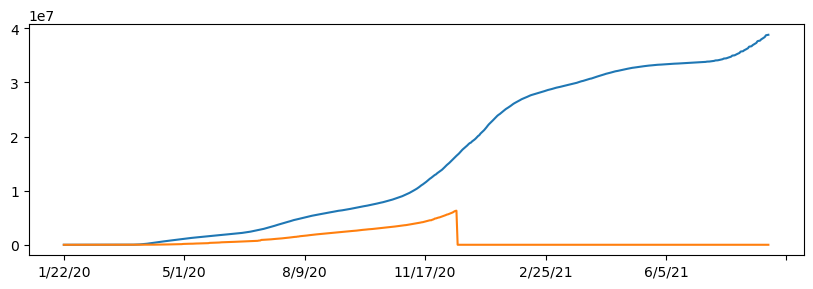

In [131]:
infected.loc['US'][2:].plot()
recovered.loc['US'][2:].plot()
plt.show()

In [132]:
infected.drop(columns=['Lat','Long'],inplace=True)
recovered.drop(columns=['Lat','Long'],inplace=True)
deaths.drop(columns=['Lat','Long'],inplace=True)

## डेटा की जांच करना

अब चलिए किसी विशेष देश की जांच करते हैं। आइए एक फ्रेम बनाते हैं जिसमें तारीख के अनुसार संक्रमणों का डेटा शामिल हो:


In [133]:
def mkframe(country):
    df = pd.DataFrame({ 'infected' : infected.loc[country] ,
                        'recovered' : recovered.loc[country],
                        'deaths' : deaths.loc[country]})
    df.index = pd.to_datetime(df.index)
    return df

df = mkframe('US')
df

infected  recovered  deaths
2020-01-22         1          0       0
2020-01-23         1          0       0
2020-01-24         2          0       0
2020-01-25         2          0       0
2020-01-26         5          0       0
...              ...        ...     ...
2021-08-25  38223029          0  632272
2021-08-26  38384360          0  633564
2021-08-27  38707294          0  636720
2021-08-28  38760363          0  637254
2021-08-29  38796746          0  637531

[586 rows x 3 columns]

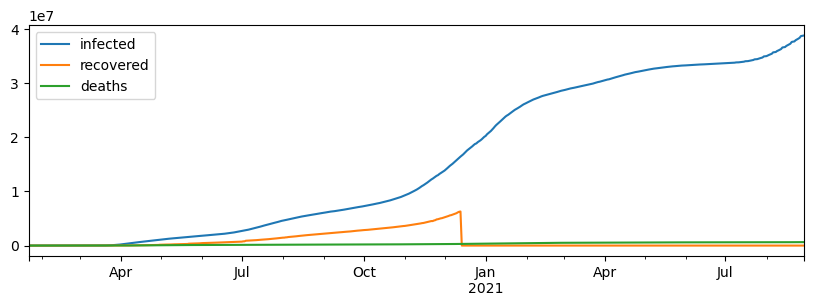

In [134]:
df.plot()
plt.show()

अब चलिए प्रत्येक दिन नए संक्रमित लोगों की संख्या की गणना करते हैं। यह हमें महामारी की प्रगति की गति को देखने की अनुमति देगा। इसे करने का सबसे आसान तरीका `diff` का उपयोग करना है:


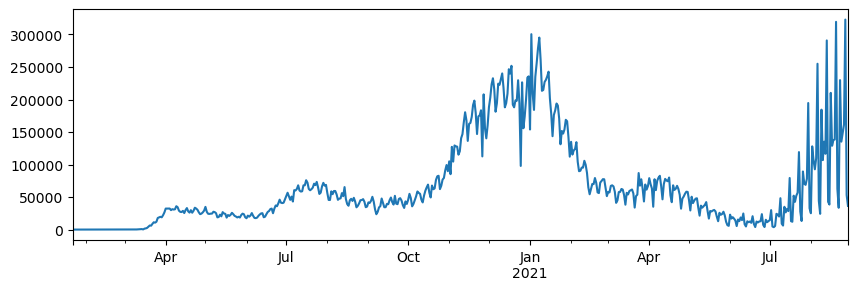

In [135]:
df['ninfected'] = df['infected'].diff()
df['ninfected'].plot()
plt.show()

हम डेटा में उच्च उतार-चढ़ाव देख सकते हैं। चलिए एक महीने को करीब से देखते हैं:


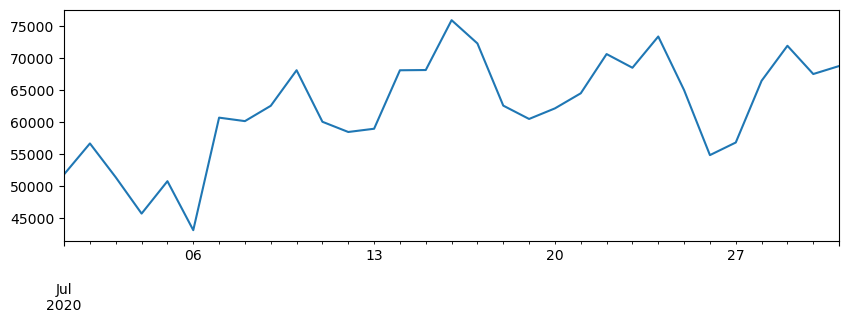

In [136]:
df[(df.index.year==2020) & (df.index.month==7)]['ninfected'].plot()
plt.show()

यह स्पष्ट रूप से दिखता है कि डेटा में साप्ताहिक उतार-चढ़ाव हैं। क्योंकि हम रुझानों को देखना चाहते हैं, इसलिए चल औसत की गणना करके वक्र को समतल करना समझदारी होगी (अर्थात प्रत्येक दिन के लिए हम पिछले कई दिनों के औसत मान की गणना करेंगे):


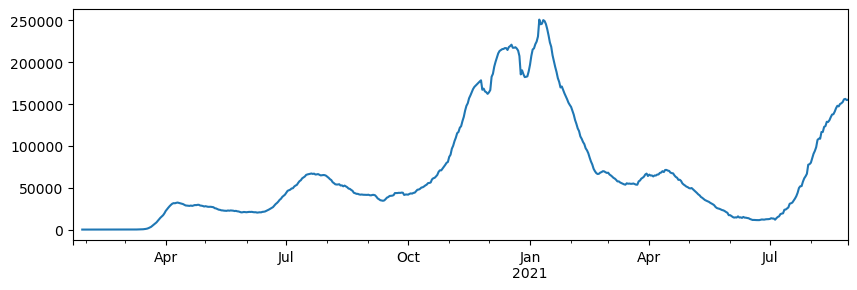

In [137]:
df['ninfav'] = df['ninfected'].rolling(window=7).mean()
df['ninfav'].plot()
plt.show()

In [138]:
countries = pd.read_csv(countries_dataset_url)
countries

UID iso2 iso3  code3     FIPS      Admin2 Province_State  \
0            4   AF  AFG    4.0      NaN         NaN            NaN   
1            8   AL  ALB    8.0      NaN         NaN            NaN   
2           12   DZ  DZA   12.0      NaN         NaN            NaN   
3           20   AD  AND   20.0      NaN         NaN            NaN   
4           24   AO  AGO   24.0      NaN         NaN            NaN   
...        ...  ...  ...    ...      ...         ...            ...   
4191  84056037   US  USA  840.0  56037.0  Sweetwater        Wyoming   
4192  84056039   US  USA  840.0  56039.0       Teton        Wyoming   
4193  84056041   US  USA  840.0  56041.0       Uinta        Wyoming   
4194  84056043   US  USA  840.0  56043.0    Washakie        Wyoming   
4195  84056045   US  USA  840.0  56045.0      Weston        Wyoming   

     Country_Region        Lat       Long_             Combined_Key  \
0       Afghanistan  33.939110   67.709953              Afghanistan   
1           Albania  41.153300   20.168300                  Albania   
2           Algeria  28.033900    1.659600                  Algeria   
3           Andorra  42.506300    1.521800                  Andorra   
4            Angola -11.202700   17.873900                   Angola   
...             ...        ...         ...                      ...   
4191             US  41.659439 -108.882788  Sweetwater, Wyoming, US   
4192             US  43.935225 -110.589080       Teton, Wyoming, US   
4193             US  41.287818 -110.547578       Uinta, Wyoming, US   
4194             US  43.904516 -107.680187    Washakie, Wyoming, US   
4195             US  43.839612 -104.567488      Weston, Wyoming, US   

      Population  
0     38928341.0  
1      2877800.0  
2     43851043.0  
3        77265.0  
4     32866268.0  
...          ...  
4191     42343.0  
4192     23464.0  
4193     20226.0  
4194      7805.0  
4195      6927.0  

[4196 rows x 12 columns]

क्योंकि इस डेटा सेट में देशों और प्रांतों दोनों की जानकारी शामिल है, पूरे देश की जनसंख्या प्राप्त करने के लिए हमें थोड़ा चतुर होना पड़ेगा:


In [139]:
countries[(countries['Country_Region']=='US') & countries['Province_State'].isna()]

UID iso2 iso3  code3  FIPS Admin2 Province_State Country_Region   Lat  \
790  840   US  USA  840.0   NaN    NaN            NaN             US  40.0   

     Long_ Combined_Key   Population  
790 -100.0           US  329466283.0

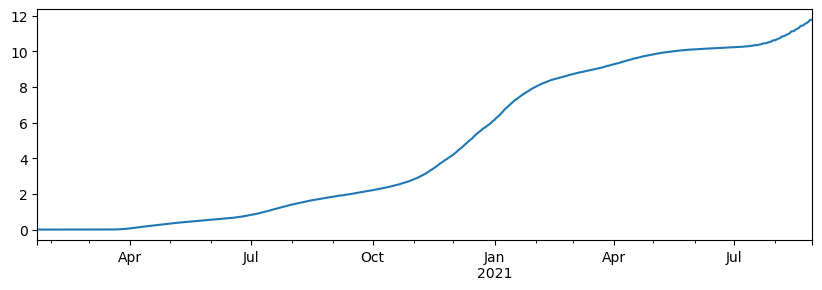

In [140]:
pop = countries[(countries['Country_Region']=='US') & countries['Province_State'].isna()]['Population'].iloc[0]
df['pinfected'] = df['infected']*100 / pop
df['pinfected'].plot(figsize=(10,3))
plt.show()

## $R_t$ की गणना करना

यह समझने के लिए कि बीमारी कितनी संक्रामक है, हम **मूल प्रजनन संख्या** $R_0$ को देखते हैं, जो यह दर्शाती है कि एक संक्रमित व्यक्ति कितने अन्य लोगों को संक्रमित करेगा। जब $R_0$ 1 से अधिक होता है, तो महामारी फैलने की संभावना होती है।

$R_0$ बीमारी का एक गुण है और इसमें उन सुरक्षात्मक उपायों को शामिल नहीं किया जाता है जो लोग महामारी को धीमा करने के लिए अपना सकते हैं। महामारी के दौरान, हम किसी भी समय $t$ पर प्रजनन संख्या $R_t$ का अनुमान लगा सकते हैं। यह दिखाया गया है कि इस संख्या का मोटे तौर पर अनुमान लगाया जा सकता है यदि हम 8 दिनों की खिड़की लें और निम्नलिखित गणना करें:  
$$R_t=\frac{I_{t-7}+I_{t-6}+I_{t-5}+I_{t-4}}{I_{t-3}+I_{t-2}+I_{t-1}+I_t}$$  
जहां $I_t$ दिन $t$ पर नए संक्रमित व्यक्तियों की संख्या है।

आइए हमारे महामारी डेटा के लिए $R_t$ की गणना करें। ऐसा करने के लिए, हम 8 `ninfected` मानों की एक रोलिंग विंडो लेंगे और ऊपर दिए गए अनुपात की गणना करने के लिए फ़ंक्शन लागू करेंगे:


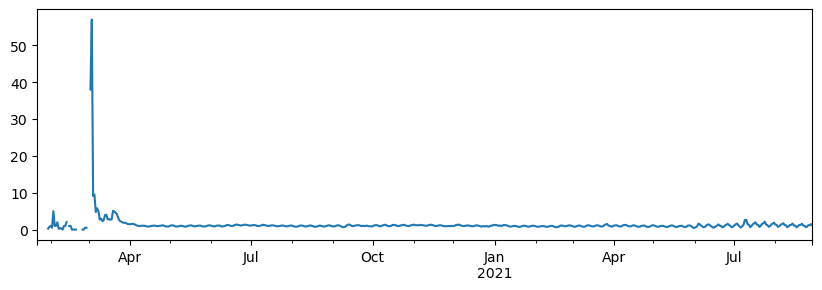

In [141]:
df['Rt'] = df['ninfected'].rolling(8).apply(lambda x: x[4:].sum()/x[:4].sum())
df['Rt'].plot()
plt.show()

आप देख सकते हैं कि ग्राफ़ में कुछ खाली जगहें हैं। ये या तो `NaN` के कारण हो सकती हैं, या फिर डेटा सेट में `inf` मानों की उपस्थिति के कारण। `inf` आमतौर पर 0 से विभाजन के कारण होता है, और `NaN` यह संकेत दे सकता है कि डेटा गायब है, या परिणाम की गणना के लिए कोई डेटा उपलब्ध नहीं है (जैसे कि हमारे फ्रेम की शुरुआत में, जहां 8 की चौड़ाई वाली रोलिंग विंडो अभी उपलब्ध नहीं है)। ग्राफ़ को बेहतर बनाने के लिए, हमें इन मानों को `replace` और `fillna` फ़ंक्शन का उपयोग करके भरना होगा।

आइए महामारी की शुरुआत पर और ध्यान दें। हम y-अक्ष के मानों को 6 से नीचे तक सीमित करेंगे, ताकि बेहतर तरीके से देख सकें, और 1 पर एक क्षैतिज रेखा खींचेंगे।


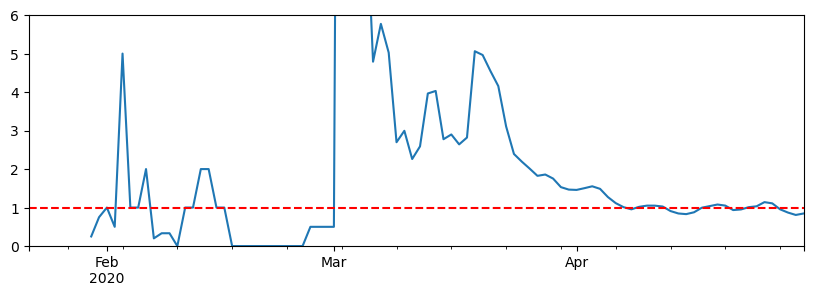

In [142]:
ax = df[df.index<"2020-05-01"]['Rt'].replace(np.inf,np.nan).fillna(method='pad').plot(figsize=(10,3))
ax.set_ylim([0,6])
ax.axhline(1,linestyle='--',color='red')
plt.show()

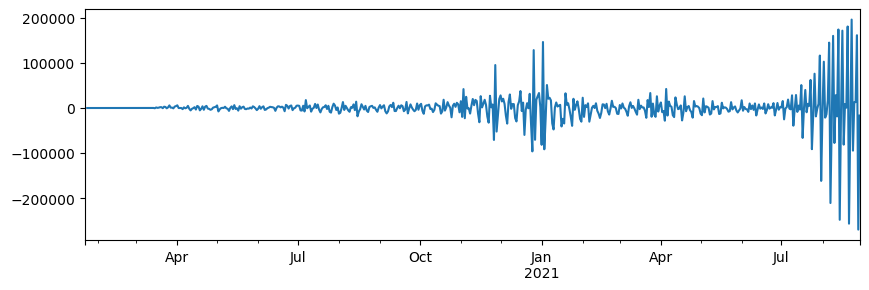

In [143]:
df['ninfected'].diff().plot()
plt.show()

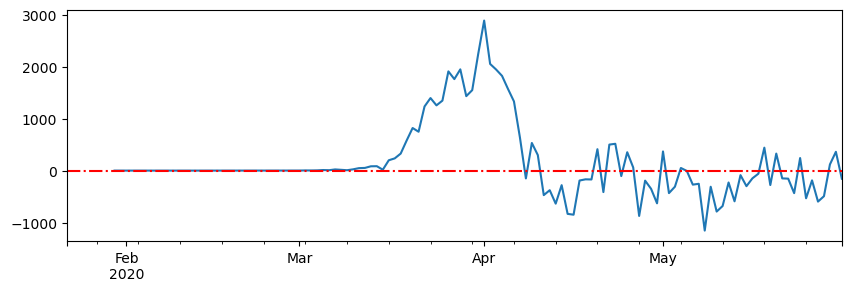

In [150]:
ax=df[df.index<"2020-06-01"]['ninfected'].diff().rolling(7).mean().plot()
ax.axhline(0,linestyle='-.',color='red')
plt.show()

## चुनौती

अब समय है कि आप कोड और डेटा के साथ और अधिक खेलें! यहां कुछ सुझाव दिए गए हैं जिनके साथ आप प्रयोग कर सकते हैं:
* विभिन्न देशों में महामारी के फैलाव को देखें।
* कई देशों के $R_t$ ग्राफ को एक ही प्लॉट पर तुलना के लिए बनाएं, या कई प्लॉट्स को साइड-बाय-साइड बनाएं।
* देखें कि संक्रमित मामलों की संख्या के साथ मौतों और ठीक होने की संख्या का क्या संबंध है।
* यह पता लगाने की कोशिश करें कि एक सामान्य बीमारी कितने समय तक रहती है, संक्रमण दर और मौतों की दर को दृष्टिगत रूप से जोड़कर और कुछ असामान्यताओं को देखकर। इसके लिए आपको विभिन्न देशों को देखना पड़ सकता है।
* मृत्यु दर की गणना करें और देखें कि यह समय के साथ कैसे बदलती है। आप बीमारी की अवधि (दिनों में) को ध्यान में रखते हुए एक समय श्रृंखला को शिफ्ट करने के बाद गणना करना चाह सकते हैं।


## संदर्भ

आप COVID महामारी के प्रसार पर आगे के अध्ययन निम्नलिखित प्रकाशनों में देख सकते हैं:
* [COVID महामारी के दौरान Rt अनुमान के लिए स्लाइडिंग SIR मॉडल](https://soshnikov.com/science/sliding-sir-model-for-rt-estimation/), ब्लॉग पोस्ट [Dmitry Soshnikov](http://soshnikov.com) द्वारा
* T.Petrova, D.Soshnikov, A.Grunin. [वैश्विक COVID-19 प्रकोप के लिए समय-निर्भर पुनरुत्पादन संख्या का अनुमान](https://www.preprints.org/manuscript/202006.0289/v1). *Preprints* **2020**, 2020060289 (doi: 10.20944/preprints202006.0289.v1)
* [GitHub पर उपरोक्त पेपर के लिए कोड](https://github.com/shwars/SlidingSIR)



---

**अस्वीकरण**:  
यह दस्तावेज़ AI अनुवाद सेवा [Co-op Translator](https://github.com/Azure/co-op-translator) का उपयोग करके अनुवादित किया गया है। जबकि हम सटीकता सुनिश्चित करने का प्रयास करते हैं, कृपया ध्यान दें कि स्वचालित अनुवाद में त्रुटियां या अशुद्धियां हो सकती हैं। मूल भाषा में उपलब्ध मूल दस्तावेज़ को प्रामाणिक स्रोत माना जाना चाहिए। महत्वपूर्ण जानकारी के लिए, पेशेवर मानव अनुवाद की सिफारिश की जाती है। इस अनुवाद के उपयोग से उत्पन्न किसी भी गलतफहमी या गलत व्याख्या के लिए हम उत्तरदायी नहीं हैं।
